In [1]:
import pandas as pd
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vincewong/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincewong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
df = pd.read_csv('data/tcc_ceds_music.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [20]:
df = df[['artist_name', 'track_name', 'release_date', 'genre', 'lyrics']]

In [5]:
df

,artist_name,track_name,release_date,genre,lyrics
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...
...,...,...,...,...,...
28367,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...
28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...
28369,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...
28370,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...


In [6]:
df.genre.unique()

array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

In [7]:
def lyrics_to_words(document):
    """
    This function splits the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word

    parameters:
    document: text to split to single words
    """
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [8]:
def toword(df):
    def unique(list1):
        # intilize a null list
        unique_list = []
       # traverse for all elements
        for x in list1:
             # check if exists in unique_list or not
                if x not in unique_list:
                    unique_list.append(x)
        return unique_list
    words = []
    #iterate trought each lyric and split unique words appending the result into the words list
    df = df.reset_index(drop=True)
    for word in df['lyrics'].tolist():
        words.append(unique(lyrics_to_words(word).split()))
    #create the new column with the information of words lists
    df['words'] = words
    return df

In [9]:
def countword(df):      
    c=[]
    for word in df['lyrics']:
        for w in word:
            c.append(w)
    return c

In [10]:
def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    name = []
    
    for value in df.columns[1:]:
        unique_words.append(np.count_nonzero(df[value]))
        total_words.append(sum(df[value]))
        name.append(str(value))
        total_news.append(main_df['name'][main_df['name']==value].count())
        data = pd.DataFrame({'name':name,
                          'unique words':unique_words,
                          'total words':total_words,
                          'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

In [11]:
def my_stop_words(var_in):
    from nltk.corpus import stopwords
    sw = stopwords.words('english')
    tmp = [word for word in var_in.split() if word not in sw]
    tmp = ' '.join(tmp)
    return tmp

In [19]:
df['lyrics']=df['lyrics'].apply(my_stop_words)
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [13]:
df_w=toword(df)

In [14]:
df_w

,artist_name,track_name,release_date,genre,lyrics,words
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,"[hold, time, feel, break, untrue, convince, sp..."
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,"[believe, drop, rain, fall, grow, darkest, nig..."
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,"[sweetheart, send, letter, goodbye, secret, fe..."
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,"[kiss, lip, want, stroll, charm, mambo, chacha..."
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,"[till, darling, matter, know, dream, live, apa..."
...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,"[cause, fuck, leave, scar, tick, tock, clock, ..."
28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,"[mink, thing, chain, ring, braclets, yap, fame..."
28369,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,"[get, ban, stick, crack, relax, plan, attack, ..."
28370,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,"[check, yeah, hear, thing, call, switch, go, t..."


In [39]:
df_w = df_w[df_w['release_date'].between(2000, 2019)]

In [49]:
df_w.reset_index(inplace=True)

In [50]:
df_w

,index,artist_name,track_name,release_date,genre,lyrics,words,negative,neutral,positive,dominant_sentiment,dominant_sentiment_score
0,4751,3 doors down,duck and run,2000,pop,world unimportant free country tell cost live ...,"[world, unimportant, free, country, tell, cost...",0.208,0.753,0.039,Negative,0.208
1,4752,ricky nelson,hello mary lou,2000,pop,hello goodbye heart sweet know hello goodbye h...,"[hello, goodbye, heart, sweet, know, pas, flas...",0.018,0.780,0.202,Positive,0.202
2,4753,modest mouse,perfect disguise,2000,pop,perfect disguise look okay best worst cause co...,"[perfect, disguise, look, okay, best, worst, c...",0.348,0.321,0.332,Negative,0.348
3,4754,joe,i believe in you,2000,pop,believe dream believe like arrow heart believe...,"[believe, dream, like, arrow, heart, miracle, ...",0.016,0.596,0.388,Positive,0.388
4,4755,fuel,empty spaces,2000,pop,mister maybe lend hand help drown starve soull...,"[mister, maybe, lend, hand, help, drown, starv...",0.375,0.497,0.128,Negative,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...
10407,28367,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,"[cause, fuck, leave, scar, tick, tock, clock, ...",0.228,0.685,0.087,Negative,0.228
10408,28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,"[mink, thing, chain, ring, braclets, yap, fame...",0.242,0.539,0.219,Negative,0.242
10409,28369,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,"[get, ban, stick, crack, relax, plan, attack, ...",0.190,0.634,0.176,Negative,0.190
10410,28370,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,"[check, yeah, hear, thing, call, switch, go, t...",0.068,0.706,0.226,Positive,0.226


In [45]:
df_w.release_date.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [46]:
before=[]
after=[]
length=[]
ulength=[]
wd=[]


a,b=df.shape
before.append(a)
    

a,b=df_w.shape
after.append(a)  
c=countword(df_w)
l=len(c)
ul=len(np.unique(c))
wd.append(c)
length.append(l)
ulength.append(ul)

In [47]:
def setimentanalyzer(df):
    neg='Negative'
    neu='Neutral'
    pos='Positive'
    negative = []
    neutral = []
    positive = []
    dominant_sentiment=[]
    dominant_sentiment_score=[]
    #Initialize the model
    sid = SentimentIntensityAnalyzer()
    #Iterate for each row of lyrics and append the scores
    for i in df.index:
       
        scores = sid.polarity_scores(df_w['lyrics'].iloc[i])
        negative.append(scores['neg'])
        neutral.append(scores['neu'])
        positive.append(scores['pos'])
        if scores['neg']>scores['pos']:
            dominant_sentiment_score.append(scores['neg'])
            dominant_sentiment.append(neg)
        elif scores['neg']<scores['pos']:
            dominant_sentiment_score.append(scores['pos'])
            dominant_sentiment.append(pos)
        else:
            dominant_sentiment_score.append(scores['neu'])
            dominant_sentiment.append(neu)
    #Create 5 columns to the main data frame  for each score
    df['negative'] = negative
    df['neutral'] = neutral
    df['positive'] = positive
    df['dominant_sentiment']=dominant_sentiment
    df['dominant_sentiment_score']=dominant_sentiment_score
    return df

In [51]:
df_sentiment=setimentanalyzer(df_w)
df_sentiment

,index,artist_name,track_name,release_date,genre,lyrics,words,negative,neutral,positive,dominant_sentiment,dominant_sentiment_score
0,4751,3 doors down,duck and run,2000,pop,world unimportant free country tell cost live ...,"[world, unimportant, free, country, tell, cost...",0.208,0.753,0.039,Negative,0.208
1,4752,ricky nelson,hello mary lou,2000,pop,hello goodbye heart sweet know hello goodbye h...,"[hello, goodbye, heart, sweet, know, pas, flas...",0.018,0.780,0.202,Positive,0.202
2,4753,modest mouse,perfect disguise,2000,pop,perfect disguise look okay best worst cause co...,"[perfect, disguise, look, okay, best, worst, c...",0.348,0.321,0.332,Negative,0.348
3,4754,joe,i believe in you,2000,pop,believe dream believe like arrow heart believe...,"[believe, dream, like, arrow, heart, miracle, ...",0.016,0.596,0.388,Positive,0.388
4,4755,fuel,empty spaces,2000,pop,mister maybe lend hand help drown starve soull...,"[mister, maybe, lend, hand, help, drown, starv...",0.375,0.497,0.128,Negative,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...
10407,28367,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,"[cause, fuck, leave, scar, tick, tock, clock, ...",0.228,0.685,0.087,Negative,0.228
10408,28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,"[mink, thing, chain, ring, braclets, yap, fame...",0.242,0.539,0.219,Negative,0.242
10409,28369,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,"[get, ban, stick, crack, relax, plan, attack, ...",0.190,0.634,0.176,Negative,0.190
10410,28370,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,"[check, yeah, hear, thing, call, switch, go, t...",0.068,0.706,0.226,Positive,0.226


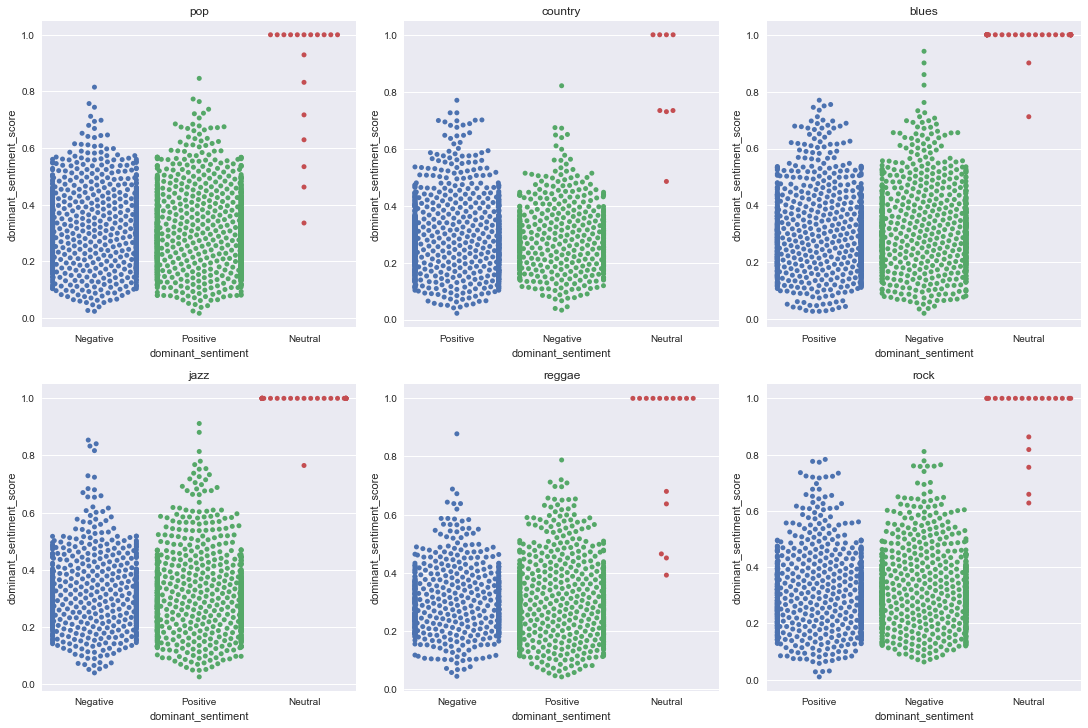

In [53]:
df_temp=[]
name=df_sentiment['genre'].unique()
name=name[0:6]
num_plots = 6
total_cols = 3
total_rows = 2
#fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), constrained_layout=True)
for genre in df_w['genre'].unique():
    df_temp.append(df_sentiment[df_sentiment['genre']==genre])
for i, var in enumerate(name):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.swarmplot(data=df_temp[i], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[row][pos])
    axs[row][pos].set_title(name[i])
    
name=df_w['genre'].unique()
name=name[6:8]

In [54]:
means_df = df_sentiment.groupby(['genre']).mean()
means_df

,index,release_date,negative,neutral,positive,dominant_sentiment_score
genre,,,,,,
blues,16252.0,2010.090042,0.198438,0.586375,0.215190,0.325695
country,11795.5,2009.400145,0.166687,0.595393,0.237920,0.294868
hip hop,27940.0,2013.697567,0.224112,0.590463,0.185415,0.286494
jazz,20229.0,2009.644728,0.191417,0.581164,0.227429,0.329643
pop,5896.0,2009.638149,0.201308,0.570577,0.228107,0.309656
reggae,22795.0,2009.971809,0.185062,0.581841,0.233094,0.306924
rock,26713.0,2010.084162,0.218714,0.569710,0.211568,0.323480


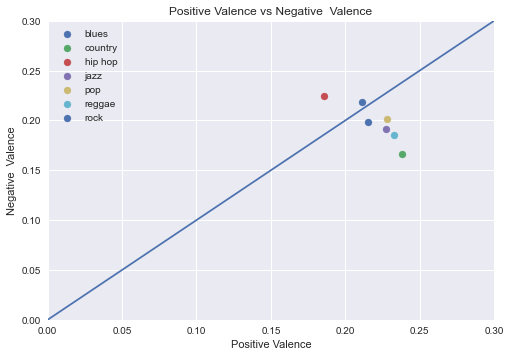

In [55]:
x = np.linspace(0, 10, 1000)
for name, group in means_df.groupby('genre'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()
plt.xlim([0,0.3])
plt.ylim([0,0.3])
plt.plot(x, x+0, linestyle='solid')
plt.title("Positive Valence vs Negative  Valence")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()#positive and negative

In [26]:
# df_info =pd.DataFrame({'before':before,'after':after,'words':wd,'unique words':ulength,'word count':length})
# df_info['diff']=df_info['before']-df_info['after']
# df_info['words per songs'] = round(df_info['word count'] / df_info['after'],0)
# df_info['words per songs'] = df_info['words per songs'].astype('int')
# df_info['lexicalrichness']=(df_info['unique words']/df_info['word count'])*100
# #df_info=df_info[['name','before','after','diff','words','words per songs','unique words','word count','lexicalrichness']]
# df_info